<a href="https://www.kaggle.com/code/abbas829/roc-auc-explanation?scriptVersionId=296031303" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🍎 The Quest for the Golden Classifier: A Story of ROC-AUC

Today, we won't just look at formulas and graphs. Instead, we are going to tell a story. A story about a village, some magical berries, and a very stressed doctor.

---

## 📖 Chapter 1: The Tale of Dr. Binary

In the small village of *Logistical Falls*, two types of berries grow: **Spicy Berries** (Red) and **Sweet Berries** (Blue). They look almost identical, but if you eat a Spicy Berry when you wanted a Sweet one, your tongue will burn for a week!

**Dr. Binary** is the village doctor. His job is to look at a berry's weight and color intensity and decide: **Is it Sweet or Spicy?**

### The Dilemma
- If he says it's **Sweet** (Positive) and it's actually **Spicy**... OUCH! (False Positive)
- If he says it's **Spicy** (Negative) and it's actually **Sweet**... he misses out on a treat. (False Negative)

Dr. Binary has a machine that gives a "Spiciness Score" from 0 to 1. He has to pick a **Threshold**. 
- If he picks a threshold of **0.1**, he'll catch almost all spicy berries, but he'll throw away many sweet ones too.
- If he picks a threshold of **0.9**, he'll eat mostly sweet berries, but occasionally a spicy one will sneak through.

**ROC and AUC help Dr. Binary find the perfect balance.**

Berries collected! First 5 berries:


,Weight,Color Intensity,Type
0,0.909845,4.095608,0
1,-0.929632,0.593671,0
2,2.074144,-0.318285,1
3,-2.190758,-0.845920,0
4,0.787514,0.753178,1


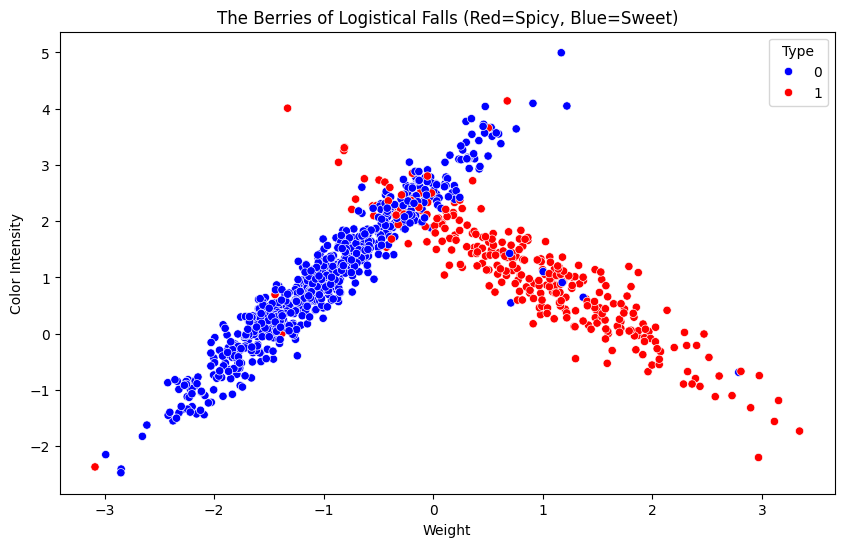

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# Set a seed for reproducibility
np.random.seed(42)

# 1. Let's create our Village's Berries
# We'll create data where weight and color help distinguish Spicy (1) from Sweet (0)
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.7], flip_y=0.05, random_state=42)

df = pd.DataFrame(X, columns=['Weight', 'Color Intensity'])
df['Type'] = y # 1 for Spicy, 0 for Sweet

print("Berries collected! First 5 berries:")
display(df.head())

# Visualize the berries
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Weight', y='Color Intensity', hue='Type', palette={0: 'blue', 1: 'red'})
plt.title("The Berries of Logistical Falls (Red=Spicy, Blue=Sweet)")
plt.show()

## 📈 Chapter 2: The ROC Curve (The Path of Thresholds)

An **ROC Curve** (Receiver Operating Characteristic) is like a map. It shows Dr. Binary how his accuracy changes as he tweaks his threshold.

It plots two things against each other:
1. **True Positive Rate (Sensitivity):** Of all the actual Spicy berries, how many did we correctly identify?
2. **False Positive Rate:** Of all the Sweet berries, how many did we accidentally call Spicy?

Imagine Dr. Binary moving a slider (the threshold) from 0 to 1. The ROC curve traces what happens at every single possible slider position.

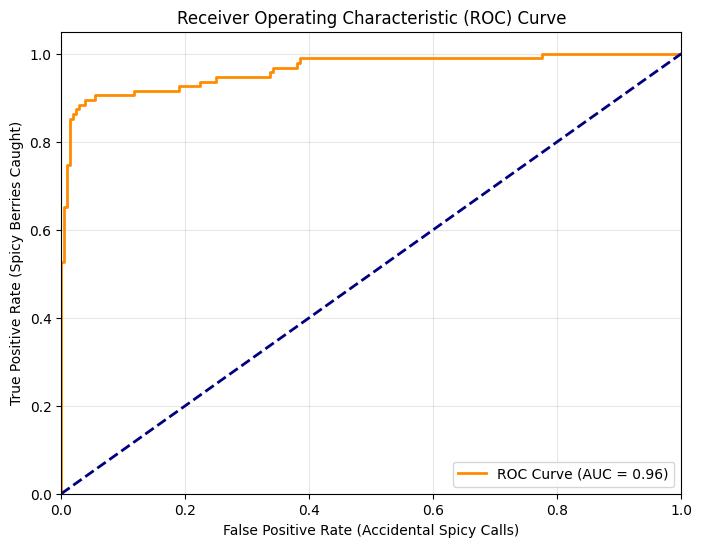

In [2]:
# 2. Train Dr. Binary's Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

# Get the probabilities (the 'Spiciness Score')
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_probs)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Accidental Spicy Calls)')
plt.ylabel('True Positive Rate (Spicy Berries Caught)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

## 🏆 Chapter 3: The AUC (The Gold Medal)

**AUC** stands for **Area Under the Curve**. 

- If the area is **1.0**, Dr. Binary is a god. He never makes mistakes. 
- If the area is **0.5**, he might as well be flipping a coin (the dashed navy line).
- If the area is **0.0**, he is perfectly wrong every single time!

### What does AUC actually mean?
If you pick one random Spicy berry and one random Sweet berry, the AUC score is the probability that Dr. Binary's machine will give the Spicy berry a higher spiciness score than the Sweet one.

It's a measure of **Separation**. How well can we tell the two apart?

## 🎓 Summary

As your **ML Mentor**, I want you to remember this:

1. **Accuracy is not enough**, especially if your data is imbalanced (if 99% of berries are sweet, saying "everything is sweet" gives 99% accuracy but fails to find the spicy ones).
2. **ROC** shows you the trade-off between missing things and making mistakes.
3. **AUC** gives you a single number to judge how good your model's ranking ability is.

### Your Turn!
Try changing the `n_samples` or `flip_y` (noise) in the first code block and see how the ROC curve warps. Can you make a perfect model?

--- 
**Author:** Tassawar Abbas  
**Topic:** ROC-AUC Mastery  